In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
coord = pd.read_csv('coordinates.csv', sep=',')

In [ ]:
coord = coord.drop(['name', 'nation_2', 'nation'], axis=1)

In [ ]:
coord

In [ ]:
df = pd.read_csv('df_africa.csv')

In [ ]:
len(df.adm1_name.isnull())

In [ ]:
df['cm_name'] = df['cm_name'].str.replace(r' - Retail', '')
df['cm_name'] = df['cm_name'].str.replace(r' - Wholesale', '')
df['cm_name'] = df['cm_name'].str.replace(r' - Producer', '')
df['cm_name'] = df['cm_name'].str.replace(r' - Farm Gate', '')

In [ ]:
len(df['adm0_name'].unique())

In [ ]:
for i in df['adm1_name'].sort_values().unique():
    print(i)

In [ ]:

new_df = df.groupby(by='cm_name').count()
new_df

In [ ]:
#df[['food_name','1']] = df['cm_name'].loc[df['cm_name'].str.split(" ").str.len() == 2].str.split(expand=True)
#df['food_name'].fillna(df['cm_name'],inplace=True)

In [ ]:
df.head()

In [ ]:
#for i in df['1'].sort_values().unique():
    #print(i)

In [ ]:
df['adm1_name'].nunique()

In [ ]:
df['adm1_name'].describe()

In [ ]:
df = df.replace("South Sudan", "Sudan")

In [ ]:
# df['new'] = np.where((df['adm1_name'] == africa['ASCII Name']), df['adm1_name'], np.nan)

In [ ]:
df['name'] = df['adm1_name']+", " +df['adm0_name']

In [ ]:
df

In [ ]:
for i in df['name'].sort_values().unique():
    print(i)

In [ ]:
coord

In [ ]:
coord.loc[coord['place'] == 'Kemo']

In [ ]:
a = pd.DataFrame({'Name':['Cascades', 'Centre', 'Centre-est', 'Centre-nord', 
'Centre-ouest', 'Centre-sud', 'Est', 'Hauts-bassins', 'Nord', 'Plateau Central',
'Sahel', 'Sud-ouest', 'Santiago', 'Santo Antao', 'Beneshangul Gumu', 'Kanifing Municipal Council', 
'Coast', 'Eastern', 'North Eastern', 'Nyanza', 'Rift Valley', 'Toliara', 'Amoron I Mania', 'Central Region', 'Northern Region, ', 'Southern Region', 'Kémo', 'Mambéré-Kadéï','Nana-Mambéré', 'Ouham Pendé', 'Sangha-Mbaéré'],
'Latitude':[10.38, 12.3787, 11.7892, 13.0983, 12.2549, 11.6713, 12.0631,11.333332, 13.5881, 12.5877, 14.249999, 11.083333, 14.93152, 17.07, 10.6390138, 13.4518974, -4.05466, 0.1768696, 3.0668696, -0.10221, -0.1, -23.35, -20.1, -13.5, -11.0, -15.5, 5.86667, 4.5, 5.97122, 7.0, 3.5],
'Longitude':[-4.5, -1.5328, -0.3571, -1.0855, -2.3688, -1.0737, 0.3635, -4.249999, -2.4212, -1.301, -0.749997, -3.083333, -23.51254, -25.171,  35.7330322, -16.6645007, 39.66359, 37.9083264, 37.9083264, 34.76171, 36.1,  43.66667, 46.4, 34.0, 34.0, 35.0, 19.2, 16.0, 15.26276, 16.0, 16.16667]},
index=[350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380])
a

In [ ]:
coord.rename(columns = {'place':'Name'}, inplace = True)
coord.rename(columns = {'lat':'Latitude'}, inplace = True)
coord.rename(columns = {'lon':'Longitude'}, inplace = True)

In [ ]:
coordinates = pd.concat([coord, a])

In [ ]:
df["adm1_name"].nunique()

In [ ]:
df = df.drop("Unnamed: 0", axis=1)

In [ ]:
len(coord)

In [ ]:
df

In [ ]:
dff = pd.merge(
    left=df,
    right=coordinates,
    left_on='adm1_name',
    right_on='Name',
    how='left'
)

In [ ]:
dff = dff.drop(["Name", "name"], axis=1)

In [ ]:
dff

In [ ]:
dff.loc[dff['Latitude'].isnull() == True]

In [ ]:
dff['adm1_name'] = dff['adm1_name'].fillna(dff['mkt_name'])

In [ ]:
dff.loc[dff['adm1_name'] == dff['mkt_name']]

In [ ]:
dff.loc[dff['Latitude'].isnull() == True]

In [ ]:
dff["cm_type"] = dff['cm_name']

In [ ]:
tmp = dff["cm_type"].values
for i in range(len(tmp)):
    tmp[i] = tmp[i].split(" (")[0]

In [ ]:
dff = dff.drop('cm_name', axis=1)

In [ ]:
(dff.loc[(dff['adm0_name'] == 'Chad') & (dff['adm1_name'].isnull() != True)])

In [ ]:
g = dff.loc[dff['Latitude'].isnull()== True]

In [ ]:
g['name'] = g['adm0_name']+", " +g['adm1_name']

In [ ]:
g

In [ ]:
for i in (g.name.unique()):
    print(i)

In [ ]:
(dff.loc[(dff['adm0_name'] == 'Chad')])

In [ ]:
mkt_coord = pd.read_csv('coordinates_updated.csv', sep=';')

In [ ]:
mkt_coord

In [ ]:
dff['name'] = dff['adm0_name']+", " +dff['adm1_name']

In [ ]:
# dff.loc[dff['name']== 'Chad, National Average']

In [ ]:
dff

In [ ]:
g

In [ ]:
g = g.drop(['Latitude', 'Longitude'], axis=1)

In [ ]:
fd = pd.merge(
    left=g,
    right=mkt_coord,
    left_on='name',
    right_on='Name',
    how='left'
)

In [ ]:
fd = fd.drop(["Name", "name"], axis=1)

In [ ]:
fd

In [ ]:
dff

In [ ]:
df_final = dff.loc[dff['Latitude'].isnull()!= True]

In [ ]:
fd.loc[fd['Latitude'].isnull()== True]

In [ ]:
df_final = df_final.drop('name', axis=1)

In [ ]:
final= pd.concat([df_final, fd])

In [ ]:
final

In [ ]:
final.info()

In [ ]:
final.loc[final['cm_type'] == 'Wage']

In [ ]:
final.groupby(by='cm_type').count()

In [ ]:
#for i in final.cm_type.sort_values().unique():
    #print(i)

In [ ]:
final.um_name.nunique()

In [ ]:
final.loc[final['um_name']== 'Loaf']

In [ ]:
unit = final.um_name.unique().tolist()
unit= dict.fromkeys(unit, pd.NA)

In [ ]:
unit['KG'] = 1
unit['L'] = 1
unit['500 G'] = 2
unit['Unit'] = 1
unit['30 pcs'] = 1
unit['125 G'] = 8
unit['Packet'] = 1
unit['900 G'] = 10/9
unit['50 Pounds'] = 1/22.68
unit['100 KG'] = 1/100
unit['90 KG'] = 1/90
unit['1 piece'] = 1
unit['400 G'] = 5/2
unit['15 KG'] = 1/15
unit['5 KG'] = 1/5
unit['12 KG'] = 1/12
unit['Day'] = 1
unit['20 KG'] = 1/20
unit['120 KG'] = 1/120
unit['20 L'] = 1/20
unit['18 KG'] = 1/18
unit['50 KG'] = 1/50
unit['160 KG'] = 1/160
unit['1.5 L'] = 2/3
unit['Sack'] = 1
unit['Package'] = 1
unit['Course'] = 1
unit['USD/LCU'] = 1
unit['Head'] = 1
unit['70 G'] = 1/0.07
unit['200 G'] = 5
unit['68 KG'] = 1/68
unit['109 KG'] = 1/109
unit['91 KG'] = 1/91
unit['93 KG'] = 1/93
unit['10 KG'] = 1/10
unit['Bunch'] = 1
unit['250 KG'] = 1/250
unit['100 Tubers'] = 1 
unit['73 KG'] = 1/73
unit['84 KG'] = 1/84
unit['52 KG'] = 1/52
unit['27 KG'] = 1/27
unit['16 KG'] = 1/16
unit['500 ML'] = 2
unit['200 ML'] = 5
unit['12.5 KG'] = 1/12.5
unit['200 ML'] = 5
unit['Loaf'] = 1/(4*1.81437)
unit['200 ML'] = 5
unit['750 ML'] = 1000/750
unit['Gallon'] = 1/3.79
unit['2.25 KG'] = 1/2.25
unit['Pile'] = 1
unit['Heap'] = 1
unit['100 L'] = 1/100
unit['1.4 KG'] = 1/1.4
unit['1.3 KG'] = 1/1.3
unit['20 G'] = 1/0.02
unit['3.4 KG'] = 1/3.4
unit['0.5 KG'] = 2
unit['1.5 KG'] = 1/1.5
unit['1.1 KG'] = 1/1.1
unit['250 G'] = 4
unit['300 G'] = 10/3
unit['2.1 KG'] = 1/2.1
unit['1.2 KG'] = 1/1.2
unit['3.1 KG'] = 1/3.1
unit['3 KG'] = 1/3
unit['3.5 KG'] = 1/3.5
unit['MT'] = 1/1000
unit['100 ML'] = 10
unit['168 G'] = 1000/168
unit['5 pcs'] = 1
unit['11 KG'] = 1/11
unit['Brush'] = 1
unit['10 pcs'] = 1
unit['Bar'] = 1/1.02
unit['250 ML'] = 4
unit['Bundle'] = 1
unit['LCU/3.5kg'] = 3.5


In [ ]:
unit.values()

In [ ]:
new_cur = final.apply(lambda x: unit[x["um_name"]] * x["mp_price"], axis=1)
new_cur

In [ ]:
final['mp_price'] = new_cur
final['mp_price'].loc[final['um_name']== 'Head'] = np.log(final['mp_price'].loc[final['um_name']== 'Head']) + 2

In [ ]:
final.loc[final['um_name']== 'Loaf']

In [ ]:
final.loc[final['um_name']== '90 KG']

In [ ]:
final = final.replace(r'100 KG', 'KG')
final = final.replace(r'90 KG', 'KG')
final = final.replace(r'500 G', 'KG')
final = final.replace(r'125 G', 'KG')
final = final.replace(r'900 G', 'KG')
final = final.replace(r'50 Pounds', 'KG')
final = final.replace(r'18 KG', 'KG')
final = final.replace(r'400 G', 'KG')
final = final.replace(r'15 KG', 'KG')
final = final.replace(r'5 KG', 'KG')
final = final.replace(r'12 KG', 'KG')
final = final.replace(r'20 KG', 'KG')
final = final.replace(r'160 KG', 'KG')
final = final.replace(r'120 KG', 'KG')
final = final.replace(r'50 KG', 'KG')
final = final.replace(r'L', 'KG')
final = final.replace(r'20 L', 'KG')
final = final.replace(r'1.5 L', 'KG')
final = final.replace(r'USD/LCU', 'KG')
final = final.replace(r'70 G', 'KG')
final = final.replace(r'200 G', 'KG')
final = final.replace(r'68 KG', 'KG')
final = final.replace(r'109 KG', 'KG')
final = final.replace(r'91 KG', 'KG')
final = final.replace(r'93 KG', 'KG')
final = final.replace(r'10 KG', 'KG')
final = final.replace(r'250 KG', 'KG')
final = final.replace(r'73 KG', 'KG')
final = final.replace(r'84 KG', 'KG')
final = final.replace(r'52 KG', 'KG')
final = final.replace(r'27 KG', 'KG')
final = final.replace(r'16 KG', 'KG')
final = final.replace(r'500 ML', 'KG')
final = final.replace(r'200 ML', 'KG')
final = final.replace(r'12.5 KG', 'KG')
final = final.replace(r'750 ML', 'KG')
final = final.replace(r'Loaf', 'KG')
final = final.replace(r'Gallon', 'KG')
final = final.replace(r'2.25 KG', 'KG')
final = final.replace(r'100 L', 'KG')
final = final.replace(r'1.4 KG', 'KG')
final = final.replace(r'1.3 KG', 'KG')
final = final.replace(r'20 G', 'KG')
final = final.replace(r'3.4 KG', 'KG')
final = final.replace(r'0.5 KG', 'KG')
final = final.replace(r'1.5 KG', 'KG')
final = final.replace(r'1.1 KG', 'KG')
final = final.replace(r'250 G', 'KG')
final = final.replace(r'300 G', 'KG')
final = final.replace(r'2.1 KG', 'KG')
final = final.replace(r'1.2 KG', 'KG')
final = final.replace(r'3 KG', 'KG')
final = final.replace(r'3.1 KG', 'KG')
final = final.replace(r'3.5 KG', 'KG')
final = final.replace(r'100 ML', 'KG')
final = final.replace(r'168 G', 'KG')
final = final.replace(r'11 KG', 'KG')
final = final.replace(r'MT', 'KG')
final = final.replace(r'Bar', 'KG')
final = final.replace(r'250 ML', 'KG')
final = final.replace(r'LCU/3.5kg', 'KG')
final = final.replace(r'Head', 'KG')


In [ ]:
final.loc[final['um_name']== '90 KG']

In [ ]:
final.sort_values(by= ['adm0_name', 'mp_month', 'mp_year'], inplace=True)

In [ ]:
final

In [ ]:
final['mp_month'] = final['mp_month'].astype('str')
final['mp_year'] = final['mp_year'].astype('str')
final['Time'] = final['mp_year']+ '-' + final['mp_month']

In [ ]:
final

In [ ]:
fg = final[['adm0_name','mp_month', 'mp_year', 'Time','mp_price','Latitude',	'Longitude']]

In [ ]:
fg.mp_year = fg.mp_year.astype(int)
fg.mp_month = fg.mp_month.astype(int)

In [ ]:
fg.sort_values(by=['adm0_name', 'mp_year','mp_month'], inplace=True)

In [ ]:
fg

In [ ]:
fg

In [ ]:
fg

In [ ]:
import seaborn as sns

In [ ]:
"""grouped_year = fg.groupby("mp_year")

#iterate through each group (each year)
for year, group in grouped_year:
    plt.figure()
    grouped_country = group.groupby("adm0_name")
    for country, data in grouped_country:
        plt.plot(data["Time"], data["mp_price"], label=country)
    plt.xlabel("Year")
    plt.ylabel("Price")
    plt.title(year)
    plt.legend()
plt.show()"""

In [ ]:
"""import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 12))
#create a scatter plot of prices by Latitude and Longitude
plt.scatter(fg["Longitude"], fg["Latitude"], c=fg["mp_price"], cmap="rainbow")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Prices of Products by Location")
plt.legend()
plt.show()"""

In [ ]:
"""import geopandas as gpd
import matplotlib.pyplot as plt

# create a GeoDataFrame from the final dataframe
gdf = gpd.GeoDataFrame(final, geometry=gpd.points_from_xy(final.Longitude, final.Latitude))

# create a basemap of Africa
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
africa = world[world['continent'] == 'Africa']
# create a scatter plot of prices of the products by Latitude and Longitude
fig, ax = plt.subplots(figsize=(15, 13))
africa.plot(ax=ax, color='white', edgecolor='black')
gdf.plot(ax=ax, column='mp_price', cmap='cubehelix', markersize=10)
plt.show()"""

In [ ]:
"""import folium
import pandas as pd

# Assume 'final' is your dataframe containing the country, latitude, longitude, and price information
data = final

# Group the data by country and calculate the mean price for each country
data_grouped = final.groupby("adm0_name")["mp_price"].mean()

# Create the map
m = folium.Map(location=[12, 10], zoom_start=3)

# Add markers for each country's average price
for country, price in data_grouped.items():
    folium.Marker(location=[data[data['adm0_name'] == country]['Latitude'].mean(), data[data['adm0_name'] == country]['Longitude'].mean()], 
                popup=f"{country}: {price}").add_to(m)

# Create a dataframe with country and price information, sorted by price in descending order
price_df = pd.DataFrame({'Country': data_grouped.index, 'Price': data_grouped.values})
price_df = price_df.sort_values(by='Price', ascending=False)

# Convert the dataframe to an HTML table
table = price_df.to_html(index=False)

table_html = folium.Html(table, script=True)
popup = folium.Popup(table_html, max_width=2650)
popup.add_to(m)
m.add_child(folium.Element("<style> .table { position: fixed; top: 50px; left: 50px; } </style>"))
# Save the map to an HTML file
m.save("map.html")

# Display the map
display(m)"""

In [ ]:
"""# Create a folium IFrame with the table
iframe = folium.IFrame(table, width=300, height=200)
popup = folium.Popup(iframe, max_width=2650)
"""

In [ ]:
import folium
data = final
data_grouped = final.groupby("adm0_name")["mp_price"].mean()

# Create a table containing the data to be displayed in the sidebar
price_df = pd.DataFrame({'Country': data_grouped.index, 'Price': data_grouped.values})
price_df = price_df.sort_values(by='Price', ascending=False)
table = price_df.to_html(index=False, classes='table table-striped')

# Create the map
m = folium.Map(location=[12, 10], zoom_start=3)

# Add markers to the map
for country, price in data_grouped.items():
    folium.Marker(location=[data[data['adm0_name'] == country]['Latitude'].mean(), data[data['adm0_name'] == country]['Longitude'].mean()], 
                popup=f"{country}: {price}").add_to(m)

# Add the sidebar to the map
folium.Html(table, script=True, width=300, height=200).add_to(m)

# Save the map to an HTML file
m.save("map.html")

# Display the map
display(m)

In [ ]:
"""
import folium
data = final
data_grouped = final.groupby("adm0_name")["mp_price"].mean()
m = folium.Map(location=[12, 10], zoom_start=3)
for country, price in data_grouped.items():
    folium.Marker(location=[data[data['adm0_name'] == country]['Latitude'].mean(), data[data['adm0_name'] == country]['Longitude'].mean()], 
                popup=f"{country}: {price}").add_to(m)
price_df = pd.DataFrame({'Country': data_grouped.index, 'Price': data_grouped.values})
price_df = price_df.sort_values(by='Price')
table = price_df.to_html(index=False)
table_popup = folium.Popup(table, max_width=1000)
folium.IFrame(table, width=600, height=200).add_to(m)
m.save("map.html")
display(m)"""

In [ ]:
"""from mpl_toolkits.basemap import Basemap
# create figure and basemap
fig, ax = plt.subplots(figsize=(10, 8))
m = Basemap(projection='mill',
            llcrnrlat=-40,
            urcrnrlat=70,
            llcrnrlon=-20,
            urcrnrlon=60,
            resolution='c',
            ax=ax)

# plot Africa map
m.drawcoastlines()
m.fillcontinents(color='lightgray', lake_color='lightblue')

# plot prices of products by Latitude and Longitude
m.scatter(final["Longitude"], final["Latitude"], c=final["mp_price"], s=10, cmap='Reds', alpha=0.7)

plt.show()"""

In [ ]:
plt.figure(figsize=(15, 12))
sns.scatterplot(x='Longitude', y='Latitude', size='mp_price', sizes=(10, 150), data=final)
plt.title("Price of products by Latitude and Longitude")
plt.grid(visible=True)

In [ ]:
"""import matplotlib.pyplot as plt
df_ls = []
for i in fg.adm0_name.unique():
    df_nat = fg.loc[fg['adm0_name']== i]
    df_ls.append(df_nat)
fg = fg.sort_values(by='Time')
grouped = fg.groupby(by='mp_year')
#iterate through each group
for name, group in grouped:
    plt.figure(figsize=(15,7))
    for country in group["adm0_name"].unique():
        
        
        plt.plot(group.loc[group["adm0_name"] == country, "Time"], group.loc[group["adm0_name"] == country, "mp_price"], label=country)
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.title(name)
    plt.legend()
plt.show()"""

In [ ]:
"""df_ls = []
for i in fg.adm0_name.unique():
    df_nat = fg.loc[fg['adm0_name']== i]
    df_ls.append(df_nat)
while len(df_ls) != 0:
    for k in df_ls:
        for j in k.mp_year.unique():
            df_year = df_ls[0].loc[df_ls[0]['mp_year'] == j]
            plt.figure(figsize=(15, 7))
            plt.plot(df_year['Time'],df_year['mp_price'])
            plt.xlabel('Year')
            mi = float(k['mp_price'].min())
            ma = float(k['mp_price'].max())
            plt.ylim(mi, ma)
            plt.ylabel('Price')
            plt.title(k['adm0_name'].unique())
            plt.show()
    del df_ls[0]"""

## code to creat barchart

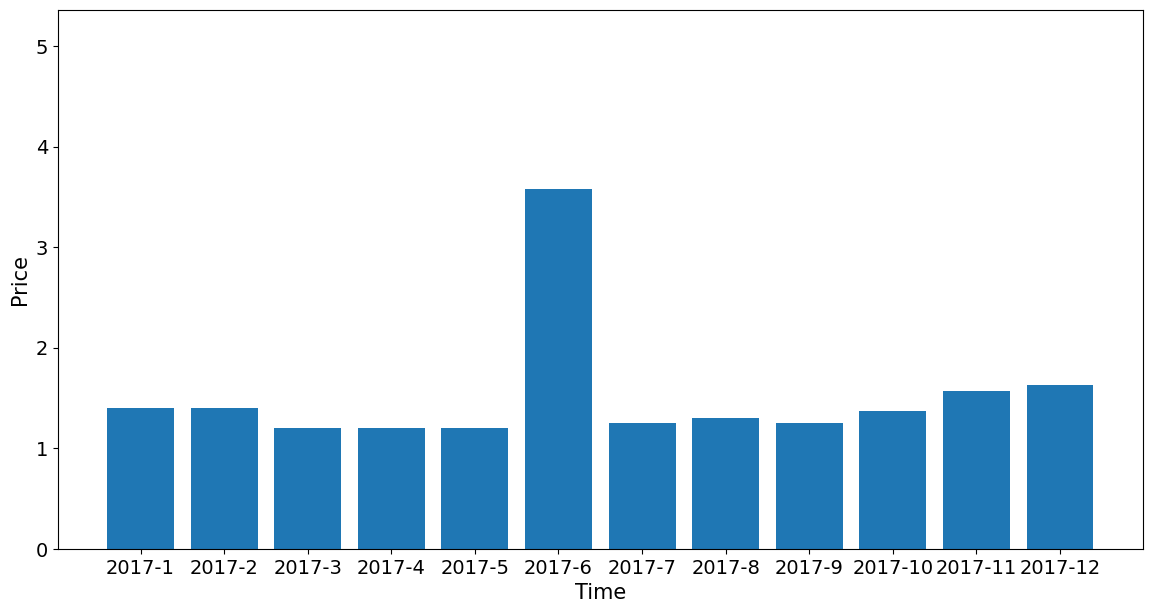

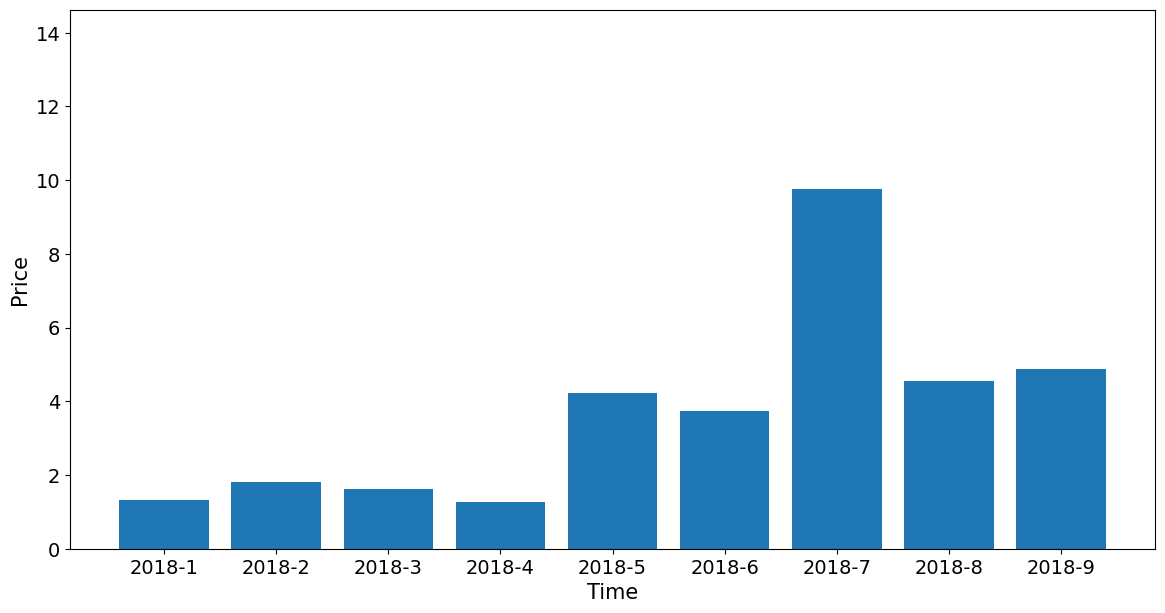

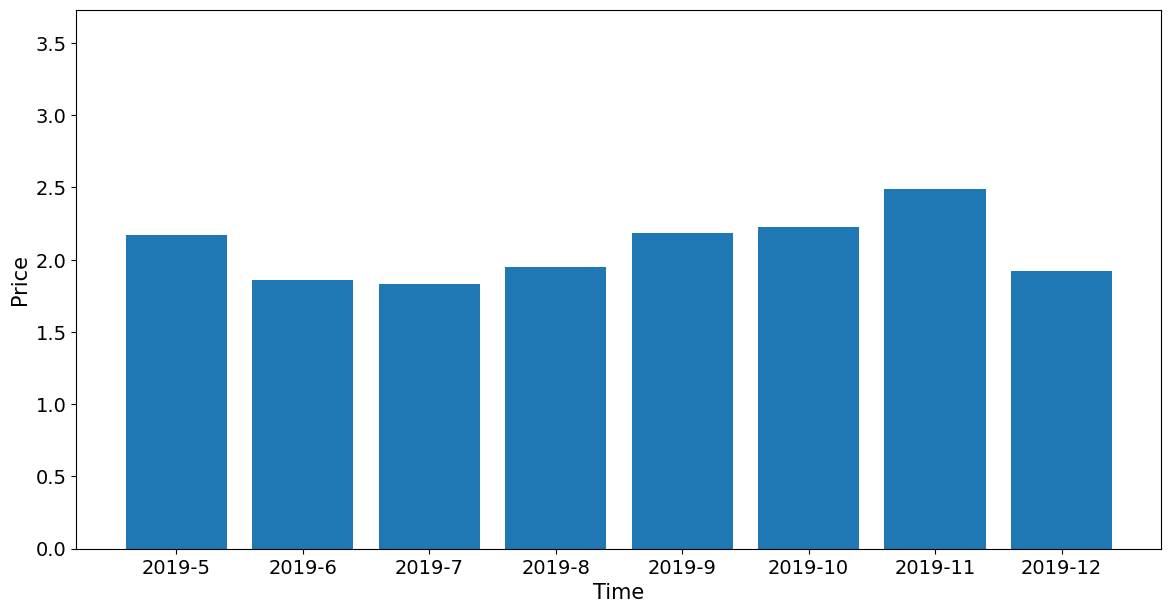

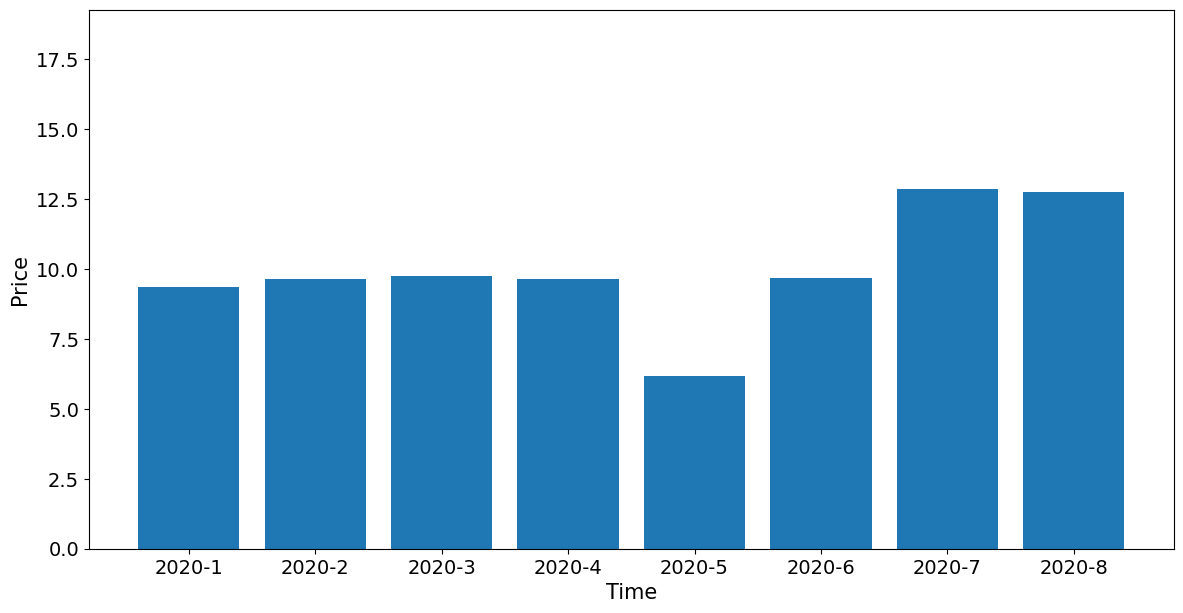

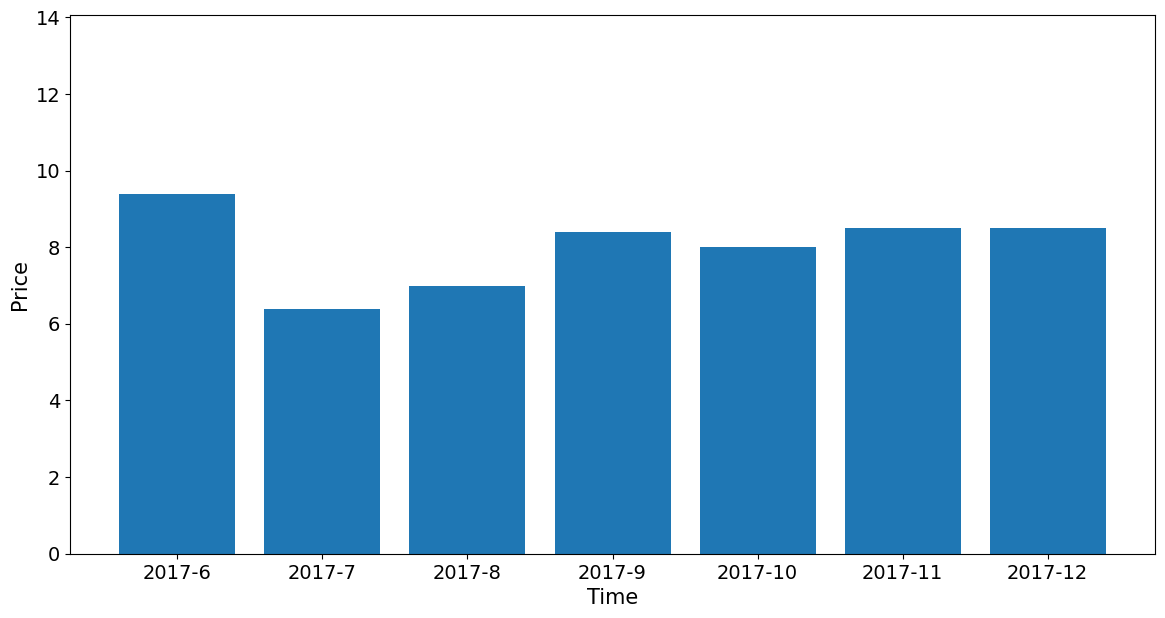

Error in callback <function flush_figures at 0x14d16ea20> (for post_execute):


KeyboardInterrupt: 

In [426]:
"""#group the dataframe by the adm0_name and mp_year columns
grouped = fg.groupby(["adm0_name","mp_year"])
#iterate through each group (each country and year)
for name, group in grouped:
    plt.figure(figsize=(14,7))
    plt.bar(group["Time"], group["mp_price"], label=name[0])
    plt.xlabel("Time", fontsize=15)
    plt.ylabel("Price", fontsize=15)
    plt.ylim(0, group['mp_price'].max()+1/2*group['mp_price'].max())
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.savefig(str(name[1])+'_'+name[0]+'.png')"""

In [ ]:
# final.to_csv('Final_africa.csv')